# Question 1

## Initialization

In [10]:
# import relavent libraries
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load csv and print the first 5 rows
current_working_directory = os.getcwd()
df = pd.read_csv(current_working_directory + '\\jewelry_customers.csv')
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [3]:
# Standardize each feature
X = df.copy()
scaler = StandardScaler()
features = list(df)
X[features] = scaler.fit_transform(X[features])
X.head()

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686


## K-Means

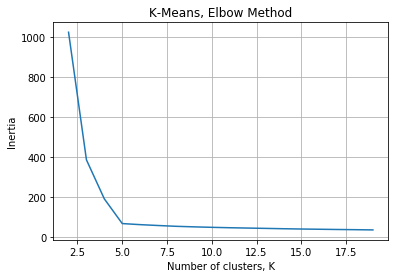

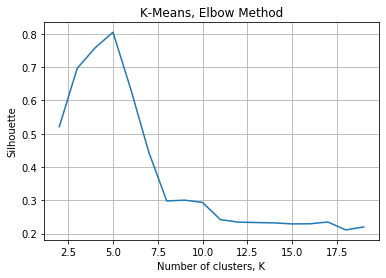

In [4]:
# trying out different K and drawing out the elbow curves
inertias = {}
silhouettes = {}
for k in range(2, 20):
    kmeans = KMeans(init='k-means++', n_init=100, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_)

plt.figure()
plt.grid(True)
plt.plot(list(inertias.keys()), list(inertias.values()))
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K")
plt.ylabel("Inertia")

plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()))
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K")
plt.ylabel("Silhouette")

plt.show()

In [5]:
# based on the graphs above, running K-Means with K = 5 and storing cluster ID as a new column of df
kmeans = KMeans(init='k-means++', n_init=100, n_clusters=5, max_iter=1000, random_state=42).fit(X)
kmeans.fit(X)
df['K-Means Clusters'] = kmeans.labels_
df.head()

,Age,Income,SpendingScore,Savings,K-Means Clusters
0,58,77769,0.791329,6559.829923,1
1,59,81799,0.791082,5417.661426,1
2,62,74751,0.702657,9258.992965,1
3,59,74373,0.765680,7346.334504,1
4,87,17760,0.348778,16869.507130,2


## DBSCAN

In [6]:
# the function below takes a specific min_sample value, and a range of eps and plots 2 graphs, displaying silhouette_scores and number of clusters 
def DBSCAN_parameter_tuning(eps_min,eps_max,eps_incre,min_samples):
    silhouettes = {}
    n_clusters = {}

    for eps in np.arange(eps_min, eps_max, eps_incre):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        silhouettes[eps] = silhouette_score(X, db.labels_)
        unique_labels = set(db.labels_)
        n_clusters[eps] = len(unique_labels)

    plt.figure()
    plt.plot(list(silhouettes.keys()), list(silhouettes.values()))
    plt.title('DBSCAN, Elbow Method, min_samples: ' + str(min_samples))
    plt.xlabel("Eps")
    plt.ylabel("Silhouette")
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.plot(list(n_clusters.keys()), list(n_clusters.values()))
    plt.title('DBSCAN, Number of Clusters, min_samples: ' + str(min_samples))
    plt.xlabel("Eps")
    plt.ylabel("Number of Clusters")
    plt.grid(True)
    plt.show()

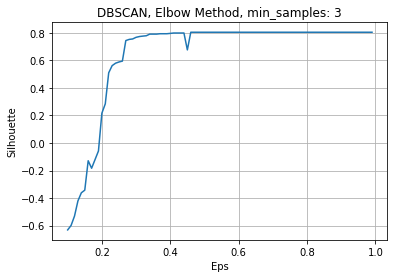

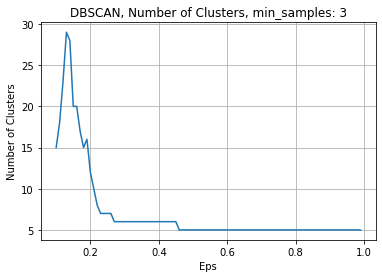

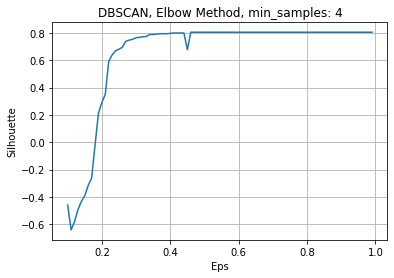

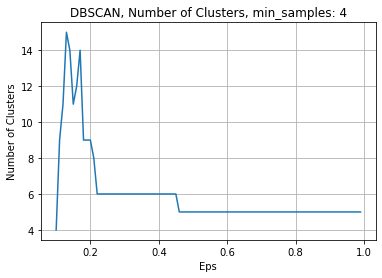

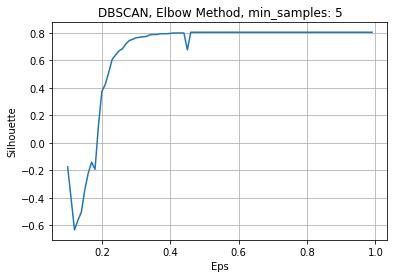

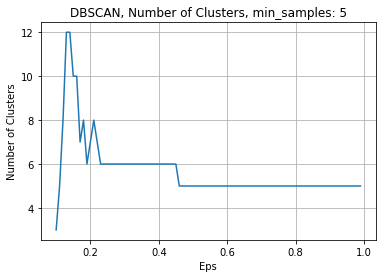

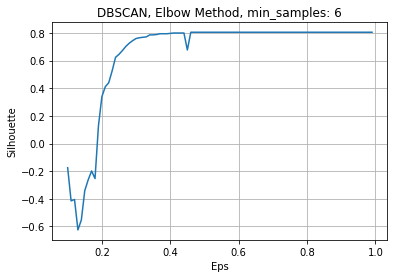

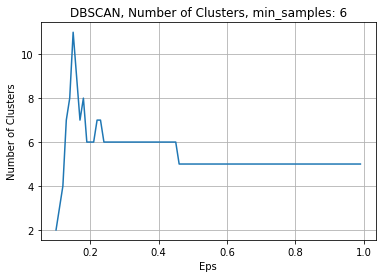

In [7]:
# eps ranged from 0.1 to 1.0 and min_samples ranged from 3 to 6 are experienmented
for min_sample in range(3,7):
    DBSCAN_parameter_tuning(0.1,1.0,0.01,min_sample)

In [8]:
# based on the graphs above, running DBSCAN with eps = 0.5 and min_samples = 6 and storing cluster ID as a new column of df
db = DBSCAN(eps=0.5, min_samples=6)
db.fit(X)
df['DBSCAN Clusters'] = db.labels_
df.head()

,Age,Income,SpendingScore,Savings,K-Means Clusters,DBSCAN Clusters
0,58,77769,0.791329,6559.829923,1,0
1,59,81799,0.791082,5417.661426,1,0
2,62,74751,0.702657,9258.992965,1,0
3,59,74373,0.765680,7346.334504,1,0
4,87,17760,0.348778,16869.507130,2,1


In [17]:
for n in range(2,5+1):
    print(n)

2
3
4
5


## Hierarchical

In [11]:
def hierarc_parameter_tuning(list_of_clusters):
    silhouettes = {}
    n_clusters = {}
    affinitys = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
    linkages = ['ward', 'complete', 'average', 'single']
    
    
    
    
    for n in list_of_clusters:
        for affinity in affinitys:
            for linkage in linkages:
                if linkage == 'ward' and affinity != 'euclidean':
                    continue
                else:
                    agg = AgglomerativeClustering(n_clusters=n, affinity=affinity, linkage=linkage).fit(X)
                    silhouettes[linkage + '-' + affinity] = silhouette_score(X, agg.labels_)
                    unique_labels = set(agg.labels_)
                    n_clusters[eps] = len(unique_labels)

    plt.figure()
    plt.plot(list(silhouettes.keys()), list(silhouettes.values()))
    plt.title('DBSCAN, Elbow Method, min_samples: ' + str(min_samples))
    plt.xlabel("Eps")
    plt.ylabel("Silhouette")
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.plot(list(n_clusters.keys()), list(n_clusters.values()))
    plt.title('DBSCAN, Number of Clusters, min_samples: ' + str(min_samples))
    plt.xlabel("Eps")
    plt.ylabel("Number of Clusters")
    plt.grid(True)
    plt.show()

agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

## K-Means vs DBSCAN

In [ ]:
# finding out the feature means of each K-Means cluster
df.groupby('K-Means Clusters').mean()

In [ ]:
# finding out the feature means of each DBSCAN cluster
df.groupby('DBSCAN Clusters').mean()

# Question 2

## 1st Split

In [ ]:
# training data imported as a Pandas Dataframe
data2 = {'Good Behavior': [False, False, False, True, True, True],
         'Age < 30': [True, False, True, False, False, False],
         'Drug dependent': [False, False, False, False, True, False],
         'Recidivist': [True, False, True, False, True, False],
        }
df2 = pd.DataFrame(data=data2)
df2

In [ ]:
# the function below calculates the entropy with input x as the % of a "True" Target
def entropy(x):
    if x == 1 or x == 0:
        return 0.0
    else:
        return -x*np.log2(x)-(1-x)*np.log2(1-x)

In [ ]:
# entropy of entire training dataset
entropy(3/6)

In [ ]:
# the function below prints the splited table based on column_name input
def split_table_by_column(df,column_name):
    print(df[df[column_name] == True])
    print('\n')
    print(df[df[column_name] == False])

In [ ]:
# the function below returns gain based on inputs
def gain(p_true,e_true,e_false,original_gain):
    p_false = 1 - p_true
    return original_gain - (p_true * e_true + p_false * e_false)

In [ ]:
# split table by Good Behavior
split_table_by_column(df2,'Good Behavior')
gain(3/6,entropy(1/3),entropy(2/3),1.0)

In [ ]:
# split table by Age < 30
split_table_by_column(df2,'Age < 30')
gain(2/6,entropy(1),entropy(1/4),1.0)

In [ ]:
# split table by Drug dependent
split_table_by_column(df2,'Drug dependent')
gain(1/6,entropy(1),entropy(2/5),1.0)

In [ ]:
# Since split table by Age < 30 gives the highest gain, we first split by Age < 30

## 2nd Split

In [ ]:
# since Age < 30 = True are all Recidivist, we will look at the remaining dataset
df3 = df2[df2['Age < 30'] == False]
df3

In [ ]:
# entropy of remaining training dataset
entropy(1/4)

In [ ]:
# split table by Good Behavior
split_table_by_column(df3,'Good Behavior')
gain(3/4,entropy(1/3),entropy(0/1),entropy(1/4))

In [ ]:
# split table by Drug dependent
split_table_by_column(df3,'Drug dependent')
gain(1/4,entropy(1),entropy(0/3),entropy(1/4))

In [ ]:
# Since split table by Drug dependent gives the highest gain, we secondly split by Drug dependent

In [ ]:
# 1st split by Age < 30, if true, then Recidivist = True

# 2nd split by Drug dependent, if Age > 30 and Drug dependent is true, then Recidivist = True
# if Age > 30 and Drug dependent is false, then Recidivist = False

# Question 3

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

# Don't include: Accuracy, Sensitivity, recall, Specificity, Precision, ROC Curve, AUC, Log Loss

# pick at least 2 and describe: what it is, how it is calculated, how it is different from accuracy, which scenarios it's best used

# show example datasets/confusion matrices to illustrate your points